In [1]:
from ema_workbench.analysis import feature_scoring
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Real data

In [2]:
from ema_workbench.analysis.feature_scoring import RuleInductionType, get_univariate_feature_scores,get_rf_feature_scores,get_ex_feature_scores

algorithms = {
    "extra trees": get_ex_feature_scores,
    "random forest": get_rf_feature_scores,
    "univariate": get_univariate_feature_scores,
}

def get_feature_scores_all(
    x, y, alg="extra trees", mode=RuleInductionType.REGRESSION, **kwargs
):
    """perform feature scoring for all outcomes using the specified feature
    scoring algorithm
    Parameters
    ----------
    x : DataFrame
    y : dict of 1d numpy arrays
        the outcomes, with a string as key, and a 1D array for each outcome
    alg : {'extra trees', 'random forest', 'univariate'}, optional
    mode : {RuleInductionType.REGRESSION, RuleInductionType.CLASSIFICATION}, optional
    kwargs : dict, optional
             any remaining keyword arguments will be passed to the specific
             feature scoring algorithm
    Returns
    -------
    DataFrame instance
    """
    oob_values = {"outcome": [], "oob_score": []}
    complete = []
    for key, value in y.items():
        fs, regressor = algorithms[alg](x, value, mode=mode, **kwargs)

        fs = fs.rename(columns={1: key})
        complete.append(fs)
        # if complete is None:
        #     complete = fs.T
        # else:
        #     complete = complete.append(fs.T, sort=True)
        if hasattr(regressor, 'oob_score'):
            oob_values['outcome'].append(key)
            oob_values['oob_score'].append(regressor.oob_score_)
        else:
            print('no oob_score for', key, value)

    complete = pd.concat(complete, sort=True, axis=1)
    if hasattr(regressor, 'oob_score'):
        return complete, pd.DataFrame(oob_values)
    else:
        return complete


    # if hasattr(regressor, 'oob_score'):
    #     return complete, oob_values
    # else:

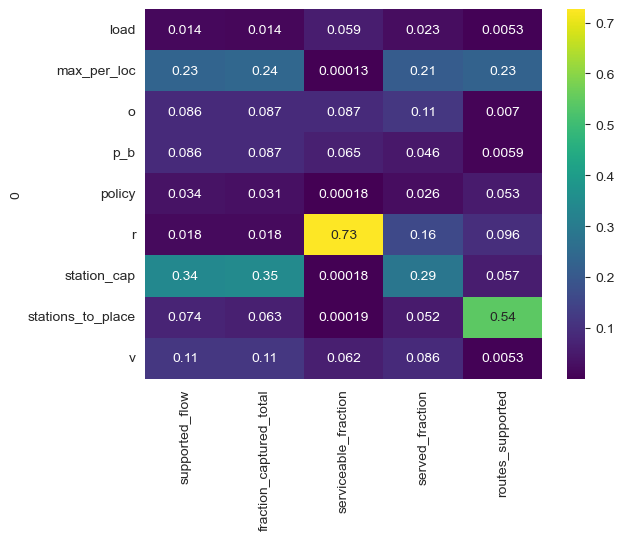

In [3]:
experiments = pickle.load( open("results/experiments_new100100.p", "rb"))
outcomes = pickle.load( open("results/outcomes_new100100.p", "rb"))

outcomes.pop('total_flow')
x = experiments
y = outcomes

fs, oob_scores = get_feature_scores_all(x, y, oob_score=True)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

In [4]:
oob_scores

,outcome,oob_score
0,supported_flow,0.969651
1,fraction_captured_total,0.969830
2,serviceable_fraction,0.999895
3,served_fraction,0.963498
4,routes_supported,0.983212


## Random samples

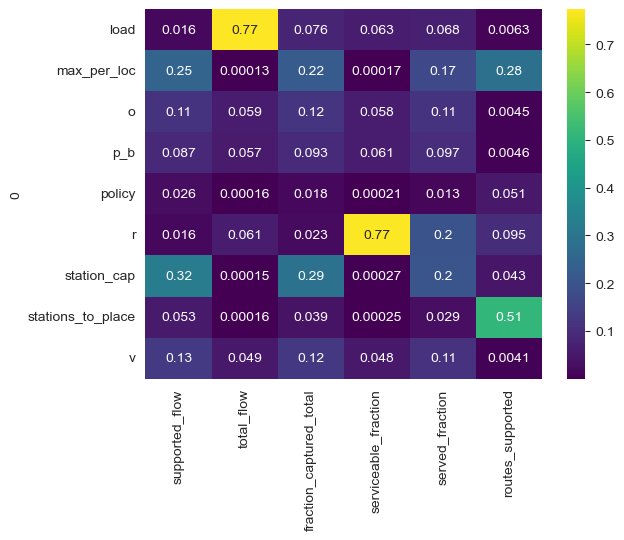

In [5]:
experiments = pickle.load( open("results/experiments_new100100random.p", "rb"))
outcomes = pickle.load( open("results/outcomes_new100100random.p", "rb"))

x = experiments
y = outcomes

fs, oob_scores = get_feature_scores_all(x, y, oob_score=True)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

In [6]:
oob_scores

,outcome,oob_score
0,supported_flow,0.969074
1,total_flow,0.999832
2,fraction_captured_total,0.962409
3,serviceable_fraction,0.999713
4,served_fraction,0.955060
5,routes_supported,0.984741
